In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Het\Downloads\final_election_result_data.csv")

In [4]:
df.head()

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes
0,1,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58
1,2,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54
2,3,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08
3,4,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97
4,5,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09


In [5]:
df.dtypes # Checking data types

Sr No              int64
State             object
Constituency      object
Candidate Name    object
Party Name        object
EVM Votes         object
Postal Votes      object
Total Votes       object
Percent Votes     object
dtype: object

In [6]:
#converting data types to numeric
column_list = ['EVM Votes', 'Postal Votes', 'Total Votes', 'Percent Votes']
for ele in column_list:
    df[ele] = pd.to_numeric(df[ele], errors = "coerce")

In [7]:
df.dtypes #Checking

Sr No               int64
State              object
Constituency       object
Candidate Name     object
Party Name         object
EVM Votes         float64
Postal Votes      float64
Total Votes       float64
Percent Votes     float64
dtype: object

### Identifying and treating Null Values

In [8]:
df.isnull().sum()

Sr No               0
State               0
Constituency        0
Candidate Name      0
Party Name          0
EVM Votes           1
Postal Votes      578
Total Votes         1
Percent Votes       1
dtype: int64

In [9]:
df[df['Postal Votes'].isna()]

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes
11,12,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,ANAND RAMNATH ARLEKAR,Independent,342.0,NaN,342.0,0.17
143,13,Andhra Pradesh,Parliamentary Constituency 13 - Guntur (Andh...,VISHNU REDDY LANKIREDDY,Bengaluru Nava Nirmana Party,461.0,NaN,461.0,0.03
150,20,Andhra Pradesh,Parliamentary Constituency 13 - Guntur (Andh...,ASHOK ANAND GALI,Independent,335.0,NaN,335.0,0.02
156,26,Andhra Pradesh,Parliamentary Constituency 13 - Guntur (Andh...,VANKAYALAPATI VENKATA SIVA RAMANJANEYULU,Independent,268.0,NaN,268.0,0.02
159,29,Andhra Pradesh,Parliamentary Constituency 13 - Guntur (Andh...,SRIKRISHNA AKKISETTI,Independent,179.0,NaN,179.0,0.01
...,...,...,...,...,...,...,...,...,...
8769,14,West Bengal,Parliamentary Constituency 8 - Maldaha Daksh...,JALALUDDIN SARKAR,Bharatiya Nyay-Adhikar Raksha Party,2075.0,NaN,2075.0,0.15
8781,8,West Bengal,Parliamentary Constituency 7 - Maldaha Uttar...,JOSEPH KISKU,Ambedkarite Party of India,4637.0,NaN,4637.0,0.33
8785,12,West Bengal,Parliamentary Constituency 7 - Maldaha Uttar...,SUBHASH BARMAN,Kamatapur People’s Party (United),2019.0,NaN,2019.0,0.14
8818,6,West Bengal,Parliamentary Constituency 11 - Murshidabad ...,SAHABUDDIN MALLIK,Independent,4156.0,NaN,4156.0,0.27


We will replace all the Nan values in Postal Votes column by 0 

In [10]:
df.fillna(0,inplace = True)
print(df.isnull().sum())

Sr No             0
State             0
Constituency      0
Candidate Name    0
Party Name        0
EVM Votes         0
Postal Votes      0
Total Votes       0
Percent Votes     0
dtype: int64


In [11]:
df[df['Total Votes'].isna()]

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes


As surat was uncontested Seat we will add automatically add BJP to winner 

## No. of Seats won by each party and adding winners column

In [12]:
df_copy = df.copy(deep = True) # Copy of original df

In [13]:
party_name = []
for consti in df_copy["Constituency"]:
    consti_data = df_copy[df_copy["Constituency"] == consti]
    name = consti_data.loc[consti_data['Total Votes'].idxmax()]["Party Name"] #idxmax gives row index of party name where total votes is max
    party_name.append(name)
    

In [14]:
df_copy["Winning Party"] = party_name

In [15]:
df_copy["Winning Party"].unique()

array(['Bharatiya Janata Party', 'Telugu Desam',
       'Yuvajana Sramika Rythu Congress Party', 'Janasena Party',
       'Asom Gana Parishad', 'Indian National Congress',
       'United People’s Party, Liberal',
       'Communist Party of India  (Marxist-Leninist)  (Liberation)',
       'Rashtriya Janata Dal', 'Janata Dal  (United)',
       'Hindustani Awam Morcha (Secular)',
       'Lok Janshakti Party(Ram Vilas)', 'Independent',
       'Jammu & Kashmir National Conference', 'Jharkhand Mukti Morcha',
       'AJSU Party', 'Janata Dal  (Secular)',
       'Communist Party of India  (Marxist)',
       'Revolutionary Socialist Party', 'Kerala Congress',
       'Indian Union Muslim League',
       'Nationalist Congress Party – Sharadchandra Pawar', 'Shiv Sena',
       'Shiv Sena (Uddhav Balasaheb Thackrey)',
       'Nationalist Congress Party', 'Voice of the People Party',
       'Zoram People’s Movement', 'Aam Aadmi Party',
       'Shiromani Akali Dal', 'Bharat Adivasi Party',
       'Ras

In [16]:
#Checking if the above performed operation is correct
df_copy[df_copy["Winning Party"] == "Bharatiya Janata Party"].nunique()

Sr No               46
State               25
Constituency       240
Candidate Name    3206
Party Name         427
EVM Votes         2990
Postal Votes       716
Total Votes       2967
Percent Votes      768
Winning Party        1
dtype: int64

In [17]:
df_winning = pd.DataFrame(columns = ["Party", "Seats Won"])
#Winner tally 
party_name_lst = df_copy["Winning Party"].unique()
for party in party_name_lst: 
    seat = df_copy[df_copy["Winning Party"] == party].nunique()[2]
    
    print(f'{party}-{seat}')

Bharatiya Janata Party-240
Telugu Desam-16
Yuvajana Sramika Rythu Congress Party-4
Janasena Party-2
Asom Gana Parishad-1
Indian National Congress-99
United People’s Party, Liberal-1
Communist Party of India  (Marxist-Leninist)  (Liberation)-2
Rashtriya Janata Dal-4
Janata Dal  (United)-12
Hindustani Awam Morcha (Secular)-1
Lok Janshakti Party(Ram Vilas)-5
Independent-7
Jammu & Kashmir National Conference-2
Jharkhand Mukti Morcha-3
AJSU Party-1
Janata Dal  (Secular)-2
Communist Party of India  (Marxist)-4
Revolutionary Socialist Party-1
Kerala Congress-1
Indian Union Muslim League-3
Nationalist Congress Party – Sharadchandra Pawar-8
Shiv Sena-7
Shiv Sena (Uddhav Balasaheb Thackrey)-9
Nationalist Congress Party-1
Voice of the People Party-1
Zoram People’s Movement-1
Aam Aadmi Party-3
Shiromani Akali Dal-1
Bharat Adivasi Party-1
Rashtriya Loktantrik Party-1
Sikkim Krantikari Morcha-1
Dravida Munnetra Kazhagam-22
Viduthalai Chiruthaigal Katchi-2
Communist Party of India-2
Marumalarchi Drav

C:\Users\Het\AppData\Local\Temp/ipykernel_22004/383650065.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seat = df_copy[df_copy["Winning Party"] == party].nunique()[2]


# Percent Win Analysis

In [18]:
# winners dataframe 
df_winners = df_copy.loc[df_copy.groupby('Constituency')['Total Votes'].idxmax()]

In [19]:
#Finding count of each parties that won no. of seats more than 50% margin
for party in party_name_lst:
    winners_series = df_winners[df_winners["Winning Party"] == party]["Percent Votes"]
    percent_count = winners_series[winners_series > 50].count()
    print(f'{party} -{percent_count}') 
    

Bharatiya Janata Party -154
Telugu Desam -13
Yuvajana Sramika Rythu Congress Party -0
Janasena Party -2
Asom Gana Parishad -1
Indian National Congress -37
United People’s Party, Liberal -0
Communist Party of India  (Marxist-Leninist)  (Liberation) -0
Rashtriya Janata Dal -0
Janata Dal  (United) -2
Hindustani Awam Morcha (Secular) -1
Lok Janshakti Party(Ram Vilas) -4
Independent -0
Jammu & Kashmir National Conference -2
Jharkhand Mukti Morcha -2
AJSU Party -0
Janata Dal  (Secular) -2
Communist Party of India  (Marxist) -2
Revolutionary Socialist Party -0
Kerala Congress -0
Indian Union Muslim League -2
Nationalist Congress Party – Sharadchandra Pawar -2
Shiv Sena -2
Shiv Sena (Uddhav Balasaheb Thackrey) -2
Nationalist Congress Party -1
Voice of the People Party -1
Zoram People’s Movement -0
Aam Aadmi Party -0
Shiromani Akali Dal -0
Bharat Adivasi Party -1
Rashtriya Loktantrik Party -0
Sikkim Krantikari Morcha -0
Dravida Munnetra Kazhagam -8
Viduthalai Chiruthaigal Katchi -0
Communist Pa

In [20]:
#df_winners["Percent_votes>50"] = if percent Votes > 50 % then 1 else no
df_winners["Percent_votes>50"] = np.where(df_winners["Percent Votes"] >= 50,"Y","N") 
#IMP function np.where is used to do element wise operation on the dataframe 

In [21]:
df_winners

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes,Winning Party,Percent_votes>50
1776,1,Haryana,Parliamentary Constituency 1 - AMBALA (Harya...,VARUN CHAUDHRY,Indian National Congress,662592.0,1065.0,663657.0,49.28,Indian National Congress,N
6800,1,Telangana,Parliamentary Constituency 1 - Adilabad (Te...,GODAM NAGESH,Bharatiya Janata Party,558936.0,9232.0,568168.0,45.98,Bharatiya Janata Party,N
0,1,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Bharatiya Janata Party,Y
67,1,Andhra Pradesh,Parliamentary Constituency 1 - Araku (ST) (A...,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470.0,5535.0,477005.0,40.96,Yuvajana Sramika Rythu Congress Party,N
499,1,Arunachal Pradesh,Parliamentary Constituency 1 - Arunachal Wes...,KIREN RIJIJU,Bharatiya Janata Party,196415.0,9002.0,205417.0,51.38,Bharatiya Janata Party,Y
...,...,...,...,...,...,...,...,...,...,...,...
633,1,Assam,Parliamentary Constituency 9 - Nagaon (Assam),PRADYUT BORDOLOI,Indian National Congress,786620.0,2230.0,788850.0,50.89,Indian National Congress,Y
275,1,Andhra Pradesh,Parliamentary Constituency 9 - Narsapuram (A...,BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),Bharatiya Janata Party,699382.0,7961.0,707343.0,57.46,Bharatiya Janata Party,Y
4459,1,Maharashtra,Parliamentary Constituency 9 - Ramtek (Maha...,Shyamkumar (Babalu) Daulat Barve,Indian National Congress,611894.0,1131.0,613025.0,48.94,Indian National Congress,N
3455,1,Madhya Pradesh,Parliamentary Constituency 9 - SATNA (Madhya...,GANESH SINGH,Bharatiya Janata Party,458373.0,1355.0,459728.0,43.41,Bharatiya Janata Party,N


In [22]:
win_percent_df = pd.crosstab(df_winners["Winning Party"],df_winners["Percent_votes>50"]).sort_values(by = "Y", ascending = False)
# pd.crosstab gives combinations of columns you mentions

<AxesSubplot:xlabel='Winning Party'>

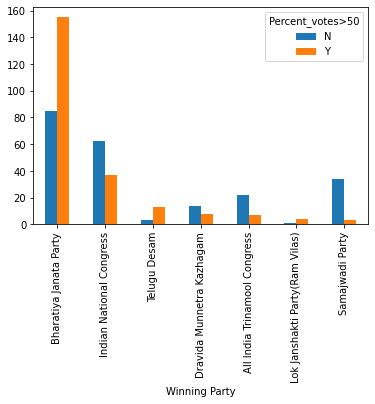

In [23]:
win_percent_df.head(7).plot.bar()

## In How many seats did BJP came second ? 

Approach - Make column of the second party and count how many it came second in 
or
directly calculate from the copy dataframe in which seats 2nd position is BJP 

## How many seats did BJP/NDA lose with less than 30,000 votes margin

In [24]:
NDA_party_list = ['Bharatiya Janata Party','Telugu Desam','Janasena Party','Asom Gana Parishad','United People’s Party, Liberal',
                 'Janata Dal  (United)','Hindustani Awam Morcha (Secular)','Lok Janshakti Party(Ram Vilas)','AJSU Party','Janata Dal  (Secular)',
                 'Shiv Sena','Nationalist Congress Party','Sikkim Krantikari Morcha','Rashtriya Lok Dal','Apna Dal (Soneylal)']

#Margin and second party column 
for each constituency: #2nd position party
    get value of party name at 2nd position
for each constiuency : 
    get value of (total votes at 1st position - total votes aat 2nd position)

In [25]:
df_copy[df_copy["Constituency"] == "Parliamentary  Constituency  24 - Surat (Gujarat) "]

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes,Winning Party
1737,1,Gujarat,Parliamentary Constituency 24 - Surat (Gujar...,MUKESHKUMAR CHANDRAKAANT DALAL ( Uncontested ),Bharatiya Janata Party,0.0,0.0,0.0,0.0,Bharatiya Janata Party


In [26]:
second_party = []

for consti in df_copy["Constituency"].unique():  # Ensure unique constituency processing
    consti_data = df_copy[df_copy["Constituency"] == consti]
    # Check if there are at least two rows in the filtered data
    if len(consti_data) > 1:
        second_party_name = consti_data.iloc[1]["Party Name"]
    else:
        # Handle cases where there is not enough data, if needed
        second_party_name = None
        
    second_party.append(second_party_name)


In [27]:
second_party

['Indian National Congress',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Bharatiya Janata Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Telugu Desam',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Bharatiya Janata Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Bharatiya Janata Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress Party',
 'Yuvajana Sramika Rythu Congress

In [28]:
for consti in df_copy["Constituency"]:
    df_copy[df_copy["Constituency"] == consti]
    for party in second_party:
        df["Second Winner"] = party

In [40]:
unique_constituencies = df_copy["Constituency"].unique()
second_winner_mapping = {constituency: party for constituency, party in zip(unique_constituencies, second_party)}

# Add the 'second_winner' column by mapping each row's constituency to the second party
df_copy['second_winner'] = df_copy['Constituency'].map(second_winner_mapping)


In [65]:
for party in df_copy["Winning Party"].unique():
    print(f'{party}',df_copy[df_copy["second_winner"]== party]["Constituency"].nunique())

Bharatiya Janata Party 154
Telugu Desam 1
Yuvajana Sramika Rythu Congress Party 21
Janasena Party 0
Asom Gana Parishad 0
Indian National Congress 167
United People’s Party, Liberal 0
Communist Party of India  (Marxist-Leninist)  (Liberation) 2
Rashtriya Janata Dal 18
Janata Dal  (United) 4
Hindustani Awam Morcha (Secular) 0
Lok Janshakti Party(Ram Vilas) 0
Independent 5
Jammu & Kashmir National Conference 1
Jharkhand Mukti Morcha 2
AJSU Party 0
Janata Dal  (Secular) 1
Communist Party of India  (Marxist) 17
Revolutionary Socialist Party 0
Kerala Congress 0
Indian Union Muslim League 0
Nationalist Congress Party – Sharadchandra Pawar 3
Shiv Sena 9
Shiv Sena (Uddhav Balasaheb Thackrey) 9
Nationalist Congress Party 3
Voice of the People Party 0
Zoram People’s Movement 0
Aam Aadmi Party 13
Shiromani Akali Dal 0
Bharat Adivasi Party 0
Rashtriya Loktantrik Party 0
Sikkim Krantikari Morcha 0
Dravida Munnetra Kazhagam 0
Viduthalai Chiruthaigal Katchi 0
Communist Party of India 4
Marumalarchi Dr

## In 154 seats BJP came second 

How many seats did bjp lost by equal to less than 10,000 margin 
Pseudo code : 
    Where second winner is BJP/NDA:
    minus the First and second total votes to find margin, then add margin column and then find margin that is more than 15,000

In [87]:
bjp_lost = df_copy[df_copy["second_winner"] == "Bharatiya Janata Party"]
margin_list = []
for consti in bjp_lost["Constituency"].unique():
    dummy = bjp_lost[bjp_lost["Constituency"] == consti].reset_index()
    margin = dummy["Total Votes"][0] -  dummy["Total Votes"][1]
#    bjp_lost["Margin"] = margi
    margin_list.append(margin)

In [100]:
margin_series = pd.Series(margin_list)
margin_series[margin_series < 30000].count()

28

## There are only around 28 seats where bjp has lost with 30,000 margin

## NOTA Analysis

Is there any constituency where NOTA is 5 or 10 %

In [108]:
nota_df = df_copy[df_copy["Party Name"] == "None of the Above"]

In [117]:
nota_df.sort_values(by = 'Percent Votes', ascending = False)

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes,Winning Party,second_winner
3303,15,Madhya Pradesh,Parliamentary Constituency 26 - INDORE (Madh...,NOTA,None of the Above,218355.0,319.0,218674.0,14.00,Bharatiya Janata Party,Bahujan Samaj Party
80,14,Andhra Pradesh,Parliamentary Constituency 1 - Araku (ST) (A...,NOTA,None of the Above,50205.0,265.0,50470.0,4.33,Yuvajana Sramika Rythu Congress Party,Bharatiya Janata Party
785,12,Bihar,Parliamentary Constituency 17 - Gopalganj (B...,NOTA,None of the Above,42713.0,150.0,42863.0,4.03,Janata Dal (United),Vikassheel Insaan Party
1233,12,Chhattisgarh,Parliamentary Constituency 10 - BASTAR (Chha...,NOTA,None of the Above,36733.0,25.0,36758.0,3.65,Bharatiya Janata Party,Indian National Congress
5104,5,Odisha,Parliamentary Constituency 12 - Nabarangpur ...,NOTA,None of the Above,43240.0,28.0,43268.0,3.48,Bharatiya Janata Party,Biju Janata Dal
...,...,...,...,...,...,...,...,...,...,...,...
1938,32,Haryana,Parliamentary Constituency 2 - KURUKSHETRA (...,NOTA,None of the Above,2420.0,19.0,2439.0,0.20,Bharatiya Janata Party,Aam Aadmi Party
2638,19,Karnataka,Parliamentary Constituency 1 - Chikkodi (Kar...,NOTA,None of the Above,2571.0,37.0,2608.0,0.19,Indian National Congress,Bharatiya Janata Party
1965,27,Haryana,Parliamentary Constituency 7 - ROHTAK (Harya...,NOTA,None of the Above,2321.0,41.0,2362.0,0.19,Indian National Congress,Bharatiya Janata Party
3734,42,Maharashtra,Parliamentary Constituency 39 - Beed (Mahara...,NOTA,None of the Above,2068.0,19.0,2087.0,0.14,Nationalist Congress Party – Sharadchandra Pawar,Bharatiya Janata Party


In [ ]:
Indore Had highest number of NOTA votes that is 14% 


In [125]:
nota_df[nota_df["Percent Votes"] > 2].count()

Sr No             38
State             38
Constituency      38
Candidate Name    38
Party Name        38
EVM Votes         38
Postal Votes      38
Total Votes       38
Percent Votes     38
Winning Party     38
second_winner     38
dtype: int64

## There are total 38 constituency is India where NOTA is more than 2 % of the voting population